# TP1 MACHINE LEARNING

## Data visualisation and dimensionality reduction 

1. Cas de villes 

In [10]:
import numpy as np 
np.set_printoptions(threshold=10000,suppress=True) 
import pandas as pd 
import warnings 
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
#lecture du fichier villes.csv
data = pd.read_csv('./villes.csv', sep=';')
X = data.ix[:, 1:13].values
labels = data.ix[:, 0].values
data.head()

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
3,besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
4,biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2


In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()#normaliser les données
pca = PCA(n_components = 0.90) # PCA telle que 90% de la variance soit expliquée
SS.fit(X)
X_norm = SS.transform(X)
pca.fit(X_norm)
X_pca = pca.transform(X_norm) # Centrer et réduire les données normalisées 


In [14]:
# L'attribut qui représente les coefficients de corrélation pour chaque mois
coeffs = pca.components_
print(coeffs)
print(max([abs(i) for i in coeffs[0]])) # 
print(max([abs(i) for i in coeffs[1]]))


[[ 0.27151028  0.28846164  0.3010811   0.30354174  0.28353089  0.27841907
   0.27290295  0.28757774  0.30472022  0.3038548   0.29242808  0.2729549 ]
 [ 0.39933494  0.29907184  0.12943051 -0.11530598 -0.32314291 -0.35846763
  -0.38879639 -0.3010133  -0.11231622  0.12249226  0.26269461  0.38693688]]
0.3047202218103136
0.3993349440714045


#Interprétation:

Posons : alpha=1/racin(12)=0.28 approximativement.

Pour la première composante, les variables qui sont supérieurs au seuil sont influentes, à savoir février, mars, avril, mai, août, septembre, octobre et novembre.

En effet, plus on est à droite, plus on est fort en température, et inversement.

Concernant le deuxièmes axe, nous distinguons que les coefficients positifs supérieurs à alpha correspondent à la période d'hiver( decembre, janvier fevrier ) tandis que les coefficients négatifs à valeur absolue supérieure à alpha correspondent a la période d'été (mai, juin, juillet, aout).

Donc plus une ville est situé vers le haut , plus elle a des températures fortes en hiver et faibles en été ( Exemple Brest ) et inversement. Une ville située au milieu signifie que la difference des températures moyennes entre hiver et été n'est pas significative.




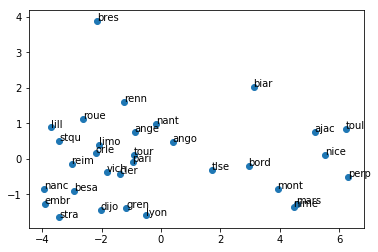

In [26]:
import matplotlib
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

2.Cas de crimes

In [15]:
data = pd.read_csv('crimes.csv', sep=';')
X = data.ix[:, 1:8].values
labels = data.ix[:, 0].values
SS = StandardScaler()

pca = PCA(n_components = 0.90) # PCA telle que 90% de la variance soit expliquée
SS.fit(X)
X_norm = SS.transform(X)
pca.fit(X_norm)
X_pca = pca.transform(X_norm) # Centrer et réduire les données
print(X_pca)

[[-0.05038664 -2.11738312  0.50673755  0.25353338]
 [ 2.44609952  0.16821368 -0.07043914  1.17225334]
 [ 3.04473945  0.85352343 -1.76973694 -0.11739168]
 [-1.06511538 -1.35910001 -0.01852361  0.02175501]
 [ 4.32729524  0.14464111  0.27895861  0.02537684]
 [ 2.53476822  0.92590218 -1.16327185  0.1137457 ]
 [-0.54682536  1.51647081  0.79184365  0.08706541]
 [ 0.9743736   1.30990789 -0.53120357 -0.4215613 ]
 [ 3.1433462  -0.61004794 -1.22774473  0.50010147]
 [ 0.49538648 -1.39480696  0.24711306 -0.06310967]
 [ 0.8314882   1.84243558 -0.78969418 -1.19223308]
 [-1.44699704 -0.00808717 -0.64057632  0.12314642]
 [ 0.51810976  0.09518714  1.13257945 -0.43562675]
 [-0.50497071  0.0000263   0.24580012 -0.2701695 ]
 [-2.60777135  0.83312672 -0.52071138 -0.30390055]
 [-0.64050434 -0.02832633 -0.50076074 -0.3279264 ]
 [-1.74444113 -1.15827284  0.66444458 -0.38699498]
 [ 1.13157549 -2.10442448  0.37118848  0.20546103]
 [-1.84485248  0.58466102 -0.53781953  0.34106205]
 [ 2.20495924 -0.19671914  0.38

In [16]:
coeffs = pca.components_
print(coeffs)

[[ 0.30027916  0.43175936  0.39687549  0.3966517   0.44015721  0.35735953
   0.29517681]
 [-0.62917444 -0.16943512  0.04224698 -0.34352815  0.20334059  0.40231912
   0.50242093]
 [ 0.1782453  -0.24419758  0.49586087 -0.06950972 -0.20989509 -0.53923144
   0.56838373]
 [-0.23211411  0.06221567 -0.55798926  0.62980445 -0.05755491 -0.23488987
   0.41923832]]


Alpha = 1 / sqrt(7) = 0.378 approximativement

1er Axe  : Les grandes valeurs des coefficients correspondent au crimes (Rapt, Vol, Attaque, Viol) 
2ème Axe : Les grandes valeurs des coefficients positifs correspondent au crimes (Larcin, Auto_theft) et les grandes valeurs des coefficients négatifs correspondent à ( Meurtre ) 
3ème Axe : Les grandes valeurs des coefficients positifs correspondent à Vol et Auto_theft, et les grandes valeurs des coefficients négatifs correspondent à Larcin.
4ème Axe : Les grandes valeurs des coefficients positifs correspondent au crimes Attaque et auto_theft et les grandes valeurs des coefficients négatifs correspondent à Vol.


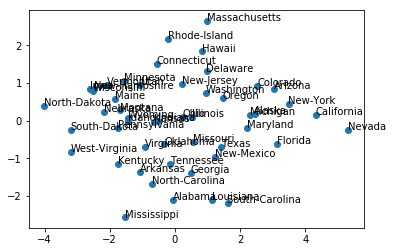

In [17]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()


3.Cas de Startup

In [30]:
data3 = pd.read_csv('./50_Startups.csv', sep=';')
X = data3.ix[:, 1:5].values
labels = data3.ix[:, 0].values

In [31]:
pca = PCA(n_components = 0.90) # PCA telle que 90% de la variance soit expliquée
SS = StandardScaler()
SS.fit(X)
X_norm = SS.transform(X)
pca.fit(X_norm)
X_pca = pca.transform(X_norm) # Centrer et réduire les données

In [32]:
#Vérifions, par acquit de conscience, les propriétés du nouvel ensemble de données. Les
#moyennes sont maintenant nulles (aux erreurs de troncature près) :
import numpy
#moyenne
print(numpy.mean(X_norm,axis=0))
#écart-type
print(numpy.std(X_norm,axis=0,ddof=0))

[-0. -0. -0. -0.]
[1. 1. 1. 1.]


In [33]:
# L'attribut qui représente les coefficients de la combinaison linéaire
coeffs = pca.components_
print(coeffs)
print(max([abs(i) for i in coeffs[0]])) # 
print(max([abs(i) for i in coeffs[1]]))

[[ 0.59347855  0.14737886  0.52064694  0.59580992]
 [-0.04048087 -0.95051314  0.30797098  0.00632069]]
0.5958099151500958
0.950513138115713


alpha=1/racin(4)=0.5 approximativement.

Pour la première composante, les variables qui sont supérieurs au seuil sont influentes,à savoir toutes les dépenses sauf les dépenses administration. 
La valeur maximale est atteinte en bénéfice. 
Concernant le deuxièmes axe, nous distinguons que les coefficients positifs différencies les entreprises de faibles et fortes dépenses. 
Les entreprises avec des tendances à avoir de fortes dépenses sont situées en bas.

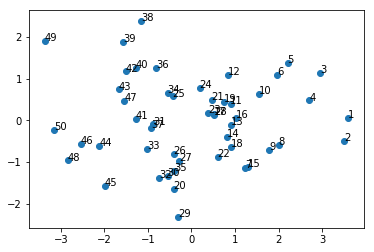

In [34]:
import matplotlib
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

## Clustering

In [24]:
from sklearn.cluster import KMeans

data = pd.read_csv('villes.csv', sep=';')
X = data.ix[:, 1:13].values
labels = data.ix[:, 0].values

SS = StandardScaler()
pca = PCA(n_components = 0.90) # PCA telle que 90% de la variance soit expliquée
SS.fit(X)
X_norm = SS.transform(X)
pca.fit(X_norm)
X_pca = pca.transform(X_norm) # Centrer et réduire les données
coeffs = pca.components_



### 1.Classification KMeans

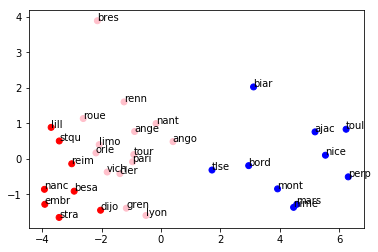

In [25]:
# CLassification KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_norm)
clustering = kmeans.labels_
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()


Le clustering effectué indique une séparation des villes selon leus températures, les villes avec des températures annuelles variant de la même manière appartiennent à la même classe. On peut également déduire que les villes appartenant à la même classe sont proches géographiquement puisqu'elles ne présentent pas une large différence de climat.

### 2.AgglomerativeClustering

#### 2.1 - Ward

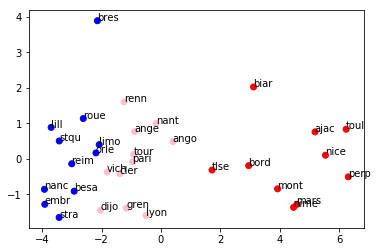

In [26]:
from sklearn.cluster import AgglomerativeClustering
aggloClust = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X_norm)

clustering = aggloClust.labels_
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

#### 2.2 - Average

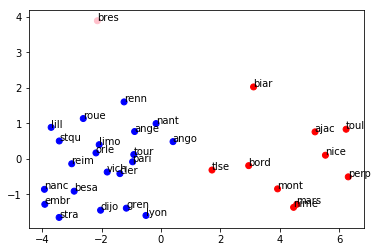

In [28]:
aggloClust = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X_norm)

clustering = aggloClust.labels_
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()


Nous remarquons que la meilleure méthode de clustering est le "Agglomerative clustering" puisqu'elle a permis d'identifier la ville de Brest comme point abérrent et de séparer le reste des autres villes en 2 classes. 

In [29]:
from sklearn import metrics
for i in np.arange(2, 6):
    clustering = KMeans(n_clusters=i).fit_predict(X_norm)
    print(metrics.silhouette_score(X, clustering,metric='euclidean'))

0.6181156437258204
0.3997417097231579
0.34788241281256377
0.29883357620984097


Nous remarquons que la répartition maximale qui correspond à la valeur maximale du silouhette index est n = 2, donc la meilleur partition est une partition en 2 classes